In [38]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categoricallo
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [39]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

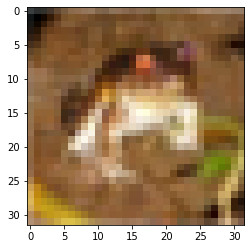

In [40]:
plt.imshow(x_train[0])

In [41]:
x_train = x_train / 255
x_test = x_test / 255

In [42]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [43]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)         

In [45]:
model.fit(x_train,y_cat_train,batch_size=128,verbose=1,epochs=10)

Epoch 1/10
391/391 [==============================] - 102s 239ms/step - loss: 1.9455 - accuracy: 0.2870
Epoch 2/10
391/391 [==============================] - 93s 238ms/step - loss: 1.3188 - accuracy: 0.5362
Epoch 3/10
391/391 [==============================] - 95s 242ms/step - loss: 1.0637 - accuracy: 0.6295
Epoch 4/10
391/391 [==============================] - 99s 254ms/step - loss: 0.9044 - accuracy: 0.6848
Epoch 5/10
391/391 [==============================] - 99s 254ms/step - loss: 0.8104 - accuracy: 0.7200
Epoch 6/10
391/391 [==============================] - 97s 247ms/step - loss: 0.7165 - accuracy: 0.7523
Epoch 7/10
391/391 [==============================] - 95s 244ms/step - loss: 0.6432 - accuracy: 0.7747
Epoch 8/10
391/391 [==============================] - 94s 240ms/step - loss: 0.5866 - accuracy: 0.7925
Epoch 9/10
391/391 [==============================] - 94s 239ms/step - loss: 0.5367 - accuracy: 0.8121
Epoch 10/10
391/391 [==============================] - 95s 244ms/step - 

In [46]:
model.save('cifar_10.h5')

In [47]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.7783 - accuracy: 0.7408 0s - loss: 0.7742 - accuracy:  - ETA: 0s - loss: 0.7748 - 


[0.7783398628234863, 0.7408000230789185]

In [48]:
from sklearn.metrics import classification_report

In [49]:
predictions = model.predict_classes(x_test)

C:\Users\koppu\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1000
           1       0.88      0.83      0.85      1000
           2       0.60      0.72      0.65      1000
           3       0.52      0.64      0.58      1000
           4       0.78      0.69      0.73      1000
           5       0.69      0.62      0.65      1000
           6       0.83      0.77      0.80      1000
           7       0.73      0.84      0.78      1000
           8       0.80      0.88      0.84      1000
           9       0.97      0.65      0.78      1000

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.74     10000
weighted avg       0.76      0.74      0.74     10000

